In [12]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors

In [13]:
log10_axion_ac, log10_fraction_axion_ac, omega_cdm, H0, Djs = np.loadtxt('/Users/saravannah/Axion-MCMC/axion_MCMC/vary_ac_fEDE_wCDM.txt', unpack = True)

In [14]:
#params = {'log10_axion_ac':0, 'log10_fraction_axion_ac':1, 'omega_cdm':2, 'H0':3}
params = [10**log10_fraction_axion_ac,log10_axion_ac, H0, omega_cdm ]#[log10_axion_ac, log10_fraction_axion_ac, omega_cdm, H0]
par_names = ['fEDE(a_c)', 'log_10(a_c)', 'H0', 'omega_CDM']#['log10_axion_ac', 'log10_fraction_axion_ac', 'omega_cdm', 'H0']

In [15]:
test = np.arange(10)
test2 = test*-1
test_bins = pd.cut(test, 5)
print(test_bins)

binned_test2 = np.zeros(5)
for i in range(5):
    bin_dummy = 0
    counter = 0
    for j in range(len(test)):
        if test[j] in test_bins[i]:
            bin_dummy = bin_dummy+test2[j]
            counter = counter+1
            
    binned_test2[i] = bin_dummy/counter
    print(test_bins[i].length, counter)
    bin_dummy = 0
    counter = 0
print(binned_test2)

[(-0.009, 1.8], (-0.009, 1.8], (1.8, 3.6], (1.8, 3.6], (3.6, 5.4], (3.6, 5.4], (5.4, 7.2], (5.4, 7.2], (7.2, 9.0], (7.2, 9.0]]
Categories (5, interval[float64]): [(-0.009, 1.8] < (1.8, 3.6] < (3.6, 5.4] < (5.4, 7.2] < (7.2, 9.0]]
1.809 2
1.809 2
1.8 2
1.8 2
1.8000000000000003 2
[-0.5 -0.5 -2.5 -2.5 -4.5]


In [16]:
#taken from https://www.geeksforgeeks.org/python-program-for-bubble-sort/
#use bubble sort to order array
def bubbleSort(arr):
    n = len(arr)
  
    # Traverse through all array elements
    for i in range(n-1):
    # range(n) also work but outer loop will repeat one time more than needed.
  
        # Last i elements are already in place
        for j in range(0, n-i-1):
  
            # traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            if arr[j] > arr[j + 1] :
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

In [17]:
#get average param value and djs in a binned parameter set
def bin_and_order(param_arr, djs):
    num_bins = 5
    
    avg_djs = np.zeros(num_bins)
    avg_params = np.zeros(num_bins)
    
    binned_param_arr = pd.cut(param_arr, num_bins)
    
    
    for i in range(num_bins):
        for j in range(len(param_arr)):
            bin_dummy = 0 #dummy variable to sum Djs so can take mean later
            counter = 0 #will count how many entries are in this bin
            if param_arr[j] in binned_param_arr[i]:
                bin_dummy = bin_dummy + djs[j]
                counter = counter + 1
                print(i, j)
            #else:
            #    print(param_arr[j],' is not in ', binned_param_arr[i])
        if counter != 0:
            print(bin_dummy)
            avg_djs[i] = bin_dummy/counter #save avg Djs 
            avg_params[i] = (binned_param_arr[i].right - binned_param_arr[i].left)/2
            bin_dummy = 0 
            counter = 0
    
    
    return avg_params, avg_djs

In [18]:
print(bin_and_order(test, test2))

0 0
0 1
1 0
1 1
2 2
2 3
3 2
3 3
4 4
4 5
(array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]))


<ipython-input-19-a36da51c6481>:5: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm = colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,vmin=0.0, vmax=2) #BoundaryNorm(levels, ncolors=cmap.N, clip=True)


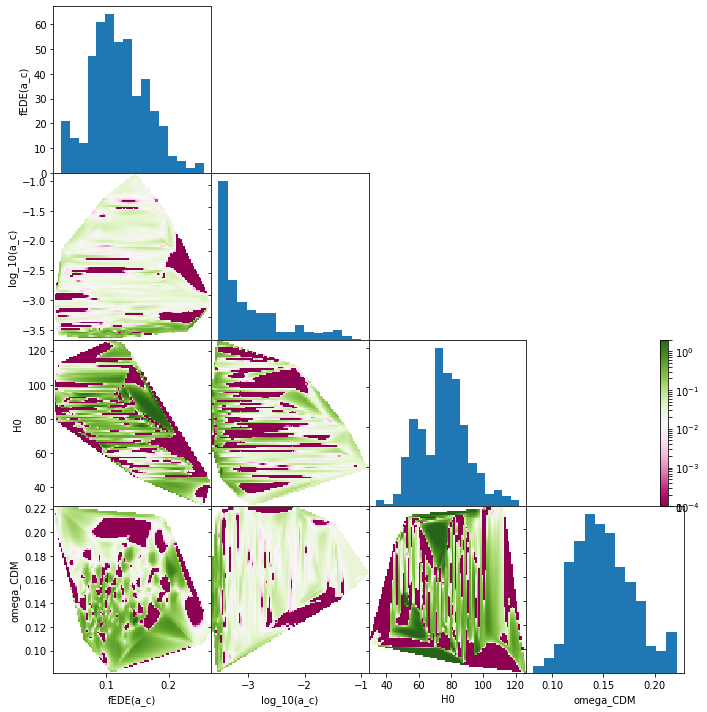

In [19]:
fig, axs = plt.subplots(4,4, figsize=(10,10), gridspec_kw = {'wspace':0, 'hspace':0})


cmap = plt.get_cmap('PiYG')
norm = colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,vmin=0.0, vmax=2) #BoundaryNorm(levels, ncolors=cmap.N, clip=True)

for rows in range(len(params)):
    for cols in range(len(params)):
        if rows == cols:
            #axs[rows,cols].scatter(params[rows], Djs)
            axs[rows,cols].hist(params[rows], bins='auto')
        if cols < rows:
            #infuriatingly, the (x,y) for subplots is backwards - it's (rows, cols) or (y,x)
            #axs[rows,cols].scatter(params[cols], params[rows], c=Djs)
            
            x, y, z = params[cols], params[rows], Djs
            grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]
            grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

            im = axs[rows][cols].pcolormesh(grid_x, grid_y, grid_z, cmap=cmap, norm=norm, shading='auto')
            
        if cols > rows:
            axs[rows][cols].axis('off')

for rows in range(len(params)):
    for cols in range(len(params)):
        if cols == 0:
            axs[rows,cols].set_ylabel(par_names[rows])
        if rows == 3:
            axs[rows,cols].set_xlabel(par_names[cols])
        if cols > 0:
            axs[rows,cols].set_yticklabels([])
        if rows < 3: 
            axs[rows,cols].set_xticklabels([])
            
fig.colorbar(im, ax=axs[2][3])           
plt.tight_layout()

plt.savefig('first_triangle_plot.png')

In [65]:
#borrowed from analysis code written for first paper
#this is to mesh the data


#data manipulation to decrease number of points
#fewer points = less computationally intensive interpolation

#distance between two points
def dist(x1,y1,z1, x2, y2, z2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)
#arrays for X, Y, Z (w0, wa, JSD), and int minimum distance between points
def reduc_arr(X_arr, Y_arr, Z_arr, min_dist):
    #abbreviated arrays of points
    X_new = [X_arr[1]]
    Y_new = [Y_arr[1]]
    Z_new = [Z_arr[1]]
    for i in range(len(X_arr)): 
        point_nearby = False
        for j in range(len(X_new)):
            #check if there's another point nearby
            if dist(X_arr[i], Y_arr[i], Z_arr[i], X_new[j], Y_new[j], Z_new[j]) < min_dist:
                point_nearby = True  
        #also removing the absurd wa tail
        if not point_nearby and Y_arr[i] > -1.0:# and Z_arr[i] < 1e-2:
            #no point already saved nearby, so save the point
            X_new.append(X_arr[i])
            Y_new.append(Y_arr[i])
            Z_new.append(Z_arr[i])
    return X_new, Y_new, Z_new
